In [1]:
import xarray as xr
import numpy as np
# import sys
import cmocean.cm as cm
import matplotlib.pyplot as plt

In [64]:
# sys.path.insert(1, '../../../../MEOPAR/tools/SalishSeaTools/salishsea_tools/')
# import river_202108 as rivers

In [2]:
import salishsea_tools.river_202108 as rivers

In [65]:
jetty_mask = xr.open_dataset('jetty_mask_bathy202108.nc')
jetty_mask

<xarray.Dataset>
Dimensions:     (y: 898, x: 398)
Dimensions without coordinates: y, x
Data variables:
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
    bfr_coef_u  (y, x) float64 ...
    bfr_coef_v  (y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Jetty Mask for Bathy 202108
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       bathymetry/Process202108Bathymetry.ipynb
    references:   grid/jetty_mask_bathy202108.nc
    history:      [2021-08-06 10:32:12] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetry

In [66]:
# jetty_mask.bfr_coef_u.to_numpy().shape
blank = np.zeros((898, 398))

In [67]:
np.argwhere(blank == 0)

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [897, 395],
       [897, 396],
       [897, 397]])

In [84]:
# order: Salmon, Homathko, Squamish, Cowichan, Nooksack, Elwha, Skagit, Stillaguamish, Nisqually

with_rivers = np.copy(blank)

# check and add the di dj for each
with_rivers[rivers.prop_dict['evi_n']['SalmonSayward']['i'], rivers.prop_dict['evi_n']['SalmonSayward']['j']] = 1
with_rivers[rivers.prop_dict['bute']['Homathko']['i'], rivers.prop_dict['bute']['Homathko']['j']] = 2
with_rivers[rivers.prop_dict['howe']['Squamish']['i'], rivers.prop_dict['howe']['Squamish']['j']] = 3
with_rivers[rivers.prop_dict['evi_s']['Cowichan1']['i'], rivers.prop_dict['evi_s']['Cowichan1']['j']] = 4
with_rivers[rivers.prop_dict['fraser']['Nooksack']['i'], rivers.prop_dict['fraser']['Nooksack']['j']] = 5
with_rivers[rivers.prop_dict['jdf']['Elwha']['i'], rivers.prop_dict['jdf']['Elwha']['j']] = 6
with_rivers[rivers.prop_dict['skagit']['Skagit1']['i'], rivers.prop_dict['skagit']['Skagit1']['j']] = 7
with_rivers[rivers.prop_dict['skagit']['Stillaguamish1']['i'], rivers.prop_dict['skagit']['Stillaguamish1']['j']] = 8
with_rivers[rivers.prop_dict['puget']['NisquallyMcAllister']['i'], rivers.prop_dict['puget']['NisquallyMcAllister']['j']] = 9

with_rivers[rivers.prop_dict['fraser']['Fraser']['i'], rivers.prop_dict['fraser']['Fraser']['j']] = 10


## add other freshwater?

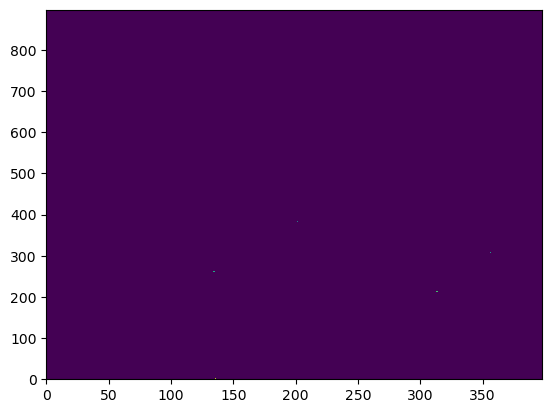

In [85]:
plt.pcolormesh(with_rivers)